In [1]:
# Python code to illustrate  
# classification using data set 
#Importing the required library 
import pandas as pd 
import sklearn
import keras
from sklearn.model_selection import train_test_split
# from sklearn.cross_validation import train_test_split 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

Using TensorFlow backend.


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import LSTM

# Loading Data

In [3]:
#Importing the dataset 
df = pd.read_csv( 
     "C:/Users/summo/OneDrive/Desktop/PROJECT_PICS/NEW DATA_SET/Own_Data/Result/Full_Data_Mean_Result.csv", header=0) 


In [4]:
df.head()

,Date,pH,Temp,DO,Salinity,Conductivity,Ammonia,Q pH,Q Temp,Q DO,...,Q pH * W pH,Q Temp * W Temp,Q DO * W DO,Q Salinity * W Salinity,Q Conductivity * W Conductivity,Q Ammonia * W Ammonia,Wn,Q * W,WQI,Result
0,10/17/1974,7.900000,22.857426,15.832946,14.863006,2129.12337,0.663618,180.000000,114.287132,-14.336577,...,1.407915,0.335222,-0.140171,0.071176,0.019516,1081.385888,1,1083.079546,1083.079546,5
1,10/17/1974,8.081018,16.000000,15.832946,14.863006,2129.12337,0.663618,216.203608,80.000000,-14.336577,...,1.691090,0.234652,-0.140171,0.071176,0.019516,1081.385888,1,1083.262152,1083.262152,5
2,10/18/1974,8.081018,22.857426,15.832946,14.863006,2129.12337,0.663618,216.203608,114.287132,-14.336577,...,1.691090,0.335222,-0.140171,0.071176,0.019516,1081.385888,1,1083.362721,1083.362721,5
3,10/19/1974,8.081018,22.857426,15.832946,14.863006,2129.12337,0.663618,216.203608,114.287132,-14.336577,...,1.691090,0.335222,-0.140171,0.071176,0.019516,1081.385888,1,1083.362721,1083.362721,5
4,10/20/1974,8.081018,22.857426,15.832946,14.863006,2129.12337,0.663618,216.203608,114.287132,-14.336577,...,1.691090,0.335222,-0.140171,0.071176,0.019516,1081.385888,1,1083.362721,1083.362721,5


# Data preparation

In [5]:
#seperating the predicting column from the whole dataset 

X = df.iloc[:,1:7]

#X=del df['Result']
#X  = df.iloc[:, 1:7].values 
# y = df.iloc[:, -1].values 

In [6]:
X.head()

,pH,Temp,DO,Salinity,Conductivity,Ammonia
0,7.900000,22.857426,15.832946,14.863006,2129.12337,0.663618
1,8.081018,16.000000,15.832946,14.863006,2129.12337,0.663618
2,8.081018,22.857426,15.832946,14.863006,2129.12337,0.663618
3,8.081018,22.857426,15.832946,14.863006,2129.12337,0.663618
4,8.081018,22.857426,15.832946,14.863006,2129.12337,0.663618


In [7]:
y=df['Result']

In [8]:
y.head()

0    5
1    5
2    5
3    5
4    5
Name: Result, dtype: int64

# LSTM with K-Fold

In [9]:
import numpy as np
from sklearn.model_selection import KFold
X1 = np.array(X)
y1 = np.array(y)
kf = KFold(n_splits=4)
kf.get_n_splits(X1)

print(kf)  
LSTM_Accuracies=[]
LSTM_Loss=[]
for train_index, test_index in kf.split(X1):
    print("TRAIN:", train_index, "TEST:", test_index)
    X1_train, X1_test = X1[train_index], X1[test_index]
#     X_train = X_train.as_matrix()
#     X_test = X_test.as_matrix()
    y1_train, y1_test = y1[train_index], y1[test_index]
    
    X1_train = pd.DataFrame(X1_train).as_matrix()
    X1_test = pd.DataFrame(X1_test).as_matrix()

    y1_train = pd.DataFrame(y1_train).as_matrix()
    y1_test = pd.DataFrame(y1_test).as_matrix()
    
    X1_train_lmse = X1_train.reshape(X1_train.shape[0], X1_train.shape[1], 1)
    X1_test_lmse = X1_test.reshape(X1_test.shape[0], X1_test.shape[1], 1)
    
    
    lstm_model = Sequential()
    lstm_model.add(LSTM(20, input_shape=(6, X1_train_lmse.shape[2]), activation='relu',
                        kernel_initializer='lecun_uniform', return_sequences=False))
    lstm_model.add(Dense(5))
    lstm_model.add(Dense(1))
    lstm_model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])
    #early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
    history_lstm_model = lstm_model.fit(X1_train_lmse, y1_train, epochs=10, batch_size=32, verbose=1, shuffle=False) 
                                        #callbacks=[early_stop])
    y_pred_test_lstm = lstm_model.predict(X1_test_lmse)
    y_train_pred_lstm = lstm_model.predict(X1_train_lmse)
    print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y1_train, y_train_pred_lstm)))
    print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y1_test, y_pred_test_lstm)))
    
    lstm_test_mse = lstm_model.evaluate(X1_test_lmse, y1_test, batch_size=1)
    print('LSTM Loss: %f'%lstm_test_mse[0])
    print('LSTM Accuracy: %f'%lstm_test_mse[1])
   
    LSTM_Loss.append(lstm_test_mse[0])
    LSTM_Accuracies.append(lstm_test_mse[1])

C:\Users\summo\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\summo\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\summo\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\summo\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
W1213 19:27:12.849649 11300 deprecation_wrapper.py:119] From C:\Users\summo\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use 

KFold(n_splits=4, random_state=None, shuffle=False)
TRAIN: [ 4997  4998  4999 ... 19985 19986 19987] TEST: [   0    1    2 ... 4994 4995 4996]


W1213 19:27:13.532071 11300 deprecation_wrapper.py:119] From C:\Users\summo\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1213 19:27:14.008829 11300 deprecation.py:323] From C:\Users\summo\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1213 19:27:15.111101 11300 deprecation_wrapper.py:119] From C:\Users\summo\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W1213 19:27:15.361742 11300 deprecation_wrapper.py:119] From C:\Users\summo\AppData\Local\C

Epoch 1/10
14991/14991 [==============================] - 8s 506us/step - loss: 1860.4764 - acc: 0.6393
Epoch 2/10
14991/14991 [==============================] - 5s 322us/step - loss: 0.4670 - acc: 0.9077
Epoch 3/10
14991/14991 [==============================] - 5s 309us/step - loss: 0.4140 - acc: 0.9133
Epoch 4/10
14991/14991 [==============================] - 5s 326us/step - loss: 0.3903 - acc: 0.9093
Epoch 5/10
14991/14991 [==============================] - 5s 350us/step - loss: 0.3948 - acc: 0.8783
Epoch 6/10
14991/14991 [==============================] - 5s 326us/step - loss: 0.4405 - acc: 0.8584
Epoch 7/10
14991/14991 [==============================] - 5s 333us/step - loss: 0.3092 - acc: 0.8891
Epoch 8/10
14991/14991 [==============================] - 5s 323us/step - loss: 0.3577 - acc: 0.8867
Epoch 9/10
14991/14991 [==============================] - 5s 325us/step - loss: 0.2533 - acc: 0.9146
Epoch 10/10
14991/14991 [==============================] - 4s 289us/step - loss: 0.2562 

C:\Users\summo\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\summo\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\summo\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\summo\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


Epoch 1/10
14991/14991 [==============================] - 7s 479us/step - loss: 328.6660 - acc: 0.0789
Epoch 2/10
14991/14991 [==============================] - 4s 291us/step - loss: 0.2595 - acc: 0.9753
Epoch 3/10
14991/14991 [==============================] - 4s 287us/step - loss: 0.2531 - acc: 0.9755
Epoch 4/10
14991/14991 [==============================] - 4s 295us/step - loss: 0.2514 - acc: 0.9755
Epoch 5/10
14991/14991 [==============================] - 4s 297us/step - loss: 0.2500 - acc: 0.9755
Epoch 6/10
14991/14991 [==============================] - 5s 302us/step - loss: 0.2490 - acc: 0.9755
Epoch 7/10
14991/14991 [==============================] - 4s 288us/step - loss: 0.2479 - acc: 0.9755
Epoch 8/10
14991/14991 [==============================] - 5s 327us/step - loss: 6.9731 - acc: 0.9483
Epoch 9/10
14991/14991 [==============================] - 4s 294us/step - loss: 0.2469 - acc: 0.9757
Epoch 10/10
14991/14991 [==============================] - 4s 294us/step - loss: 0.2460 -

C:\Users\summo\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\summo\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\summo\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\summo\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


Epoch 1/10
14991/14991 [==============================] - 8s 539us/step - loss: 853.5934 - acc: 0.6280
Epoch 2/10
14991/14991 [==============================] - 5s 344us/step - loss: 469.0762 - acc: 0.6769
Epoch 3/10
14991/14991 [==============================] - 5s 307us/step - loss: 1.0707 - acc: 0.7904
Epoch 4/10
14991/14991 [==============================] - 4s 295us/step - loss: 0.7688 - acc: 0.8778
Epoch 5/10
14991/14991 [==============================] - 4s 290us/step - loss: 0.7297 - acc: 0.8385
Epoch 6/10
14991/14991 [==============================] - 5s 322us/step - loss: 0.6969 - acc: 0.8259
Epoch 7/10
14991/14991 [==============================] - 5s 358us/step - loss: 0.6291 - acc: 0.8588
Epoch 8/10
14991/14991 [==============================] - 5s 326us/step - loss: 0.5691 - acc: 0.9093
Epoch 9/10
14991/14991 [==============================] - 5s 326us/step - loss: 0.5201 - acc: 0.9284
Epoch 10/10
14991/14991 [==============================] - 5s 329us/step - loss: 0.4825

C:\Users\summo\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\summo\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\summo\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\summo\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


Epoch 1/10
14991/14991 [==============================] - 8s 562us/step - loss: 1755.8966 - acc: 0.4960
Epoch 2/10
14991/14991 [==============================] - 5s 326us/step - loss: 0.5354 - acc: 0.8272
Epoch 3/10
14991/14991 [==============================] - 5s 366us/step - loss: 0.3039 - acc: 0.8749
Epoch 4/10
14991/14991 [==============================] - 9s 616us/step - loss: 0.1687 - acc: 0.9503
Epoch 5/10
14991/14991 [==============================] - 7s 447us/step - loss: 0.1569 - acc: 0.9528
Epoch 6/10
14991/14991 [==============================] - 6s 369us/step - loss: 0.1295 - acc: 0.9627
Epoch 7/10
14991/14991 [==============================] - 6s 421us/step - loss: 0.1171 - acc: 0.9773
Epoch 8/10
14991/14991 [==============================] - 5s 322us/step - loss: 0.1102 - acc: 0.9740
Epoch 9/10
14991/14991 [==============================] - 5s 332us/step - loss: 0.1125 - acc: 0.9604
Epoch 10/10
14991/14991 [==============================] - 5s 323us/step - loss: 0.1397 

In [62]:
print(LSTM_Accuracies)
print(LSTM_Loss)

[0.9063438062837703, 0.9993996397838704, 0.9491695017010207, 0.9379627776666]
[0.1878250213574526, 0.0013691800457408922, 2.323117694426467, 0.3944626586985024]


# Model Visualization graphs

In [63]:
#accuracy = {LSTM_Accuracies}
#loss = {LSTM_Loss : }

A=np.array(LSTM_Accuracies)
L=np.array(LSTM_Loss)
N=['Fold1','Fold2','Fold3','Fold4']

<BarContainer object of 4 artists>

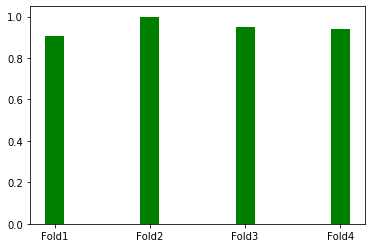

In [64]:
plt.bar(N, A ,  color = 'g', width = 0.20, label='Accuracy of Test')

<BarContainer object of 4 artists>

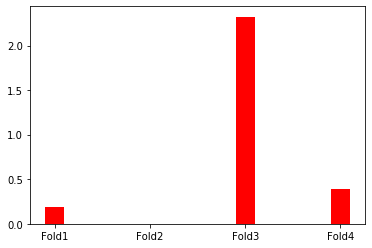

In [65]:
plt.bar(N, L, color = 'r', width = 0.20, label='RMSE')

W1213 22:05:46.077254 11300 legend.py:1282] No handles with labels found to put in legend.


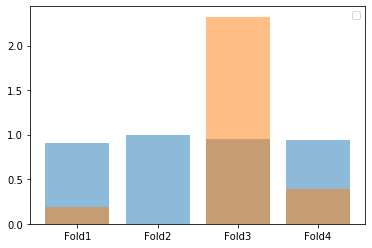

In [66]:
plt.bar(N,A, align='center', alpha=0.5)  #blue
plt.bar(N,L, align='center', alpha=0.5)   #orange
plt.legend()                   

<BarContainer object of 4 artists>

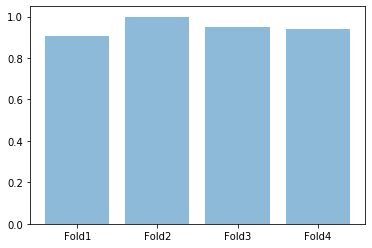

In [67]:
plt.bar(N,A, align='center', alpha=0.5)  # Accuracies

<BarContainer object of 4 artists>

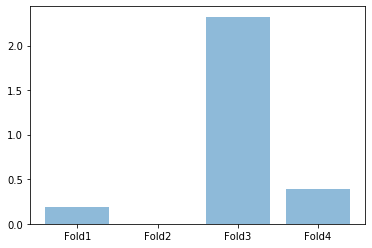

In [68]:
plt.bar(N,L, align='center', alpha=0.5)   # Losses